# IHS Plots
Plots for the IHS experiments

1. Experiment 0 - error comparison for growing data size
2. Experiment 1 - Error for iterations.

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config Completer.use_jedi = False

### Experiment 0

In [53]:
df = pd.read_csv('experiment0-ihs-ols.csv')

In [54]:
df.head(10)

,Rows,Optimal,Classical CountSketch,Classical SRHT,Classical SJLT,Classical Gaussian,IHS CountSketch,IHS SRHT,IHS SJLT,IHS Gaussian
0,100,0.323996,0.459637,0.368525,0.428797,0.430266,0.323815,0.323994,0.323739,0.323760
1,200,0.223890,0.291453,0.260590,0.307823,0.310595,0.223861,0.223929,0.223788,0.223966
2,400,0.133502,0.181772,0.151288,0.219452,0.209577,0.133441,0.133521,0.133911,0.133389
3,800,0.103169,0.165766,0.138350,0.171544,0.172853,0.103196,0.103151,0.103058,0.104034
4,1600,0.071955,0.126908,0.110650,0.153442,0.153245,0.072067,0.072062,0.072552,0.071548
5,3200,0.052906,0.132156,0.122109,0.116060,0.105018,0.052711,0.052904,0.053290,0.052832
6,6400,0.040178,0.129400,0.135367,0.124882,0.135314,0.040421,0.040283,0.039990,0.040246
7,12800,0.027462,0.112758,0.106972,0.104564,0.106362,0.027640,0.027348,0.027442,0.027158
8,25600,0.018214,0.120012,0.099146,0.113525,0.114390,0.018418,0.018168,0.018082,0.018338
9,51200,0.014862,0.118791,0.116907,0.107498,0.100035,0.014803,0.016394,0.014828,0.015058


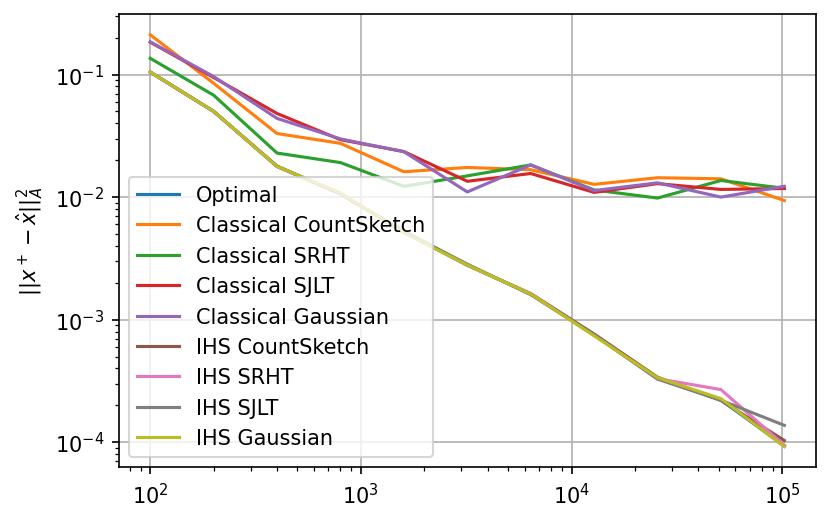

In [55]:
fig,ax = plt.subplots(dpi=150)
x = df['Rows']
for col in df.columns:
    if col != "Rows":
        ax.plot(x,df[col]**2,label=col)
ax.legend()
ax.set_yscale('log',base=10)
ax.set_xscale('log',base=10)
ax.set_ylabel(r'$|| x^+ - \hat{x} ||_A^2$')
#ax.set_ylim(1E-3,1)
ax.grid()

In [56]:
df

,Rows,Optimal,Classical CountSketch,Classical SRHT,Classical SJLT,Classical Gaussian,IHS CountSketch,IHS SRHT,IHS SJLT,IHS Gaussian
0,100,0.323996,0.459637,0.368525,0.428797,0.430266,0.323815,0.323994,0.323739,0.323760
1,200,0.223890,0.291453,0.260590,0.307823,0.310595,0.223861,0.223929,0.223788,0.223966
2,400,0.133502,0.181772,0.151288,0.219452,0.209577,0.133441,0.133521,0.133911,0.133389
3,800,0.103169,0.165766,0.138350,0.171544,0.172853,0.103196,0.103151,0.103058,0.104034
4,1600,0.071955,0.126908,0.110650,0.153442,0.153245,0.072067,0.072062,0.072552,0.071548
5,3200,0.052906,0.132156,0.122109,0.116060,0.105018,0.052711,0.052904,0.053290,0.052832
6,6400,0.040178,0.129400,0.135367,0.124882,0.135314,0.040421,0.040283,0.039990,0.040246
7,12800,0.027462,0.112758,0.106972,0.104564,0.106362,0.027640,0.027348,0.027442,0.027158
8,25600,0.018214,0.120012,0.099146,0.113525,0.114390,0.018418,0.018168,0.018082,0.018338
9,51200,0.014862,0.118791,0.116907,0.107498,0.100035,0.014803,0.016394,0.014828,0.015058


## Experiment 1

In [57]:
df_opt = pd.read_csv('experiment1-ihs-iterations-opt.csv')
df_model = pd.read_csv('experiment1-ihs-iterations-model.csv')

In [58]:
df_opt.head()

,CountSketch5,CountSketch10,SRHT5,SRHT10,SJLT5,SJLT10,Gaussian5,Gaussian10
0,0.722733,0.367433,0.735273,0.337999,0.587729,0.411506,0.705476,0.345380
1,0.444498,0.165440,0.442009,0.102473,0.400593,0.192777,0.486874,0.118516
2,0.287685,0.069393,0.328139,0.036124,0.279556,0.077253,0.332859,0.045888
3,0.192451,0.028423,0.218344,0.013192,0.182450,0.031133,0.253116,0.017097
4,0.125232,0.010803,0.132444,0.004290,0.138906,0.011086,0.185774,0.005969


In [59]:
np.log(np.sqrt(df_model)).head()

,CountSketch5,CountSketch10,SRHT5,SRHT10,SJLT5,SJLT10,Gaussian5,Gaussian10
0,-0.135649,-0.455324,-0.132473,-0.481210,-0.237935,-0.384520,-0.144242,-0.465887
1,-0.365726,-0.705661,-0.372778,-0.757376,-0.432664,-0.683804,-0.334082,-0.793002
2,-0.563760,-0.830007,-0.501100,-0.857414,-0.550122,-0.829382,-0.532433,-0.859595
3,-0.668254,-0.864497,-0.652712,-0.865163,-0.707095,-0.850810,-0.546684,-0.862812
4,-0.772849,-0.865769,-0.762734,-0.864963,-0.730591,-0.861542,-0.715576,-0.863831


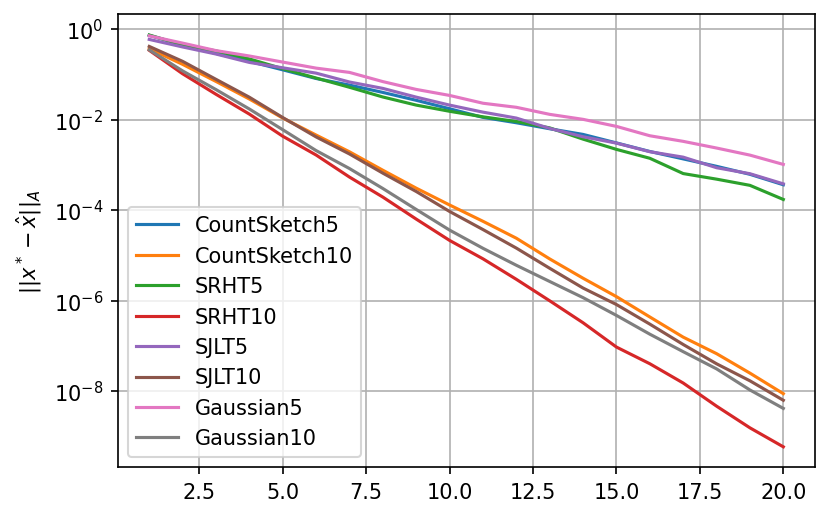

In [60]:
fig,ax = plt.subplots(dpi=150)
x = df_opt.index
for col in df_opt.columns:
    if col != "Rows":
        ax.plot(1+x,df_opt[col],label=col)
ax.legend()
ax.set_yscale('log',base=10)
#ax.set_xscale('log',base=10)
ax.set_ylabel(r'$|| x^* - \hat{x} ||_A$')
#ax.set_ylim(1E-3,1)
ax.grid()

Note that the axis in the IHS paper is slightly off but it is equivalent.  
If we subtract $1$ from all of the $y$ values to plot then we recover the plot from the ihs paper.
I can't justify why this is the case though so do not do so.

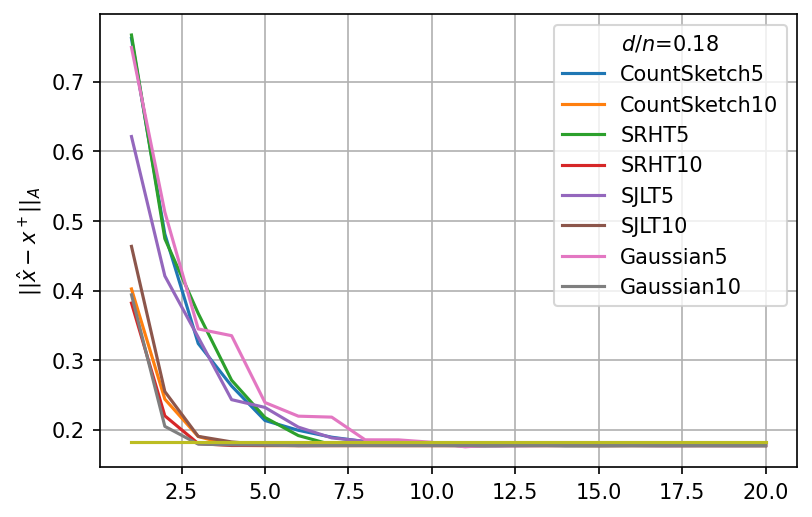

In [61]:
d_over_n = np.sqrt(200 / 6000)
fig,ax = plt.subplots(dpi=150)
x = df_model.index
for col in df_model.columns:
    if col != "Rows":
        ax.plot(1+x,(df_model[col]),label=col)
        #ax.plot(1+x,np.log(df_model[col]),label=col)
ax.plot(1+x,(d_over_n*np.ones_like(1+x)))
#ax.plot(1+x,np.log(d_over_n*np.ones_like(1+x)))
ax.legend(title=fr'$d/n$={d_over_n:.2f}')
#ax.set_yscale('log',base=10)
#ax.set_xscale('log',base=10)
ax.set_ylabel(r'$|| \hat{x} - x^+ ||_A$')
#ax.set_ylim(0.15,0.5)
#ax.set_ylim(1E-3,1)
ax.grid()

In [62]:
df = pd.DataFrame(np.zeros((10,6)))
df.columns = pd.MultiIndex.from_product([['SVD', 'SJLT','CountSketch'],['Sketch Time','SVD Time']])
df

SVD                 SJLT          CountSketch         
  Sketch Time SVD Time Sketch Time SVD Time Sketch Time SVD Time
0         0.0      0.0         0.0      0.0         0.0      0.0
1         0.0      0.0         0.0      0.0         0.0      0.0
2         0.0      0.0         0.0      0.0         0.0      0.0
3         0.0      0.0         0.0      0.0         0.0      0.0
4         0.0      0.0         0.0      0.0         0.0      0.0
5         0.0      0.0         0.0      0.0         0.0      0.0
6         0.0      0.0         0.0      0.0         0.0      0.0
7         0.0      0.0         0.0      0.0         0.0      0.0
8         0.0      0.0         0.0      0.0         0.0      0.0
9         0.0      0.0         0.0      0.0         0.0      0.0

In [63]:
df['SVD','SVD Time'] = 1.

In [64]:
df

SVD                 SJLT          CountSketch         
  Sketch Time SVD Time Sketch Time SVD Time Sketch Time SVD Time
0         0.0      1.0         0.0      0.0         0.0      0.0
1         0.0      1.0         0.0      0.0         0.0      0.0
2         0.0      1.0         0.0      0.0         0.0      0.0
3         0.0      1.0         0.0      0.0         0.0      0.0
4         0.0      1.0         0.0      0.0         0.0      0.0
5         0.0      1.0         0.0      0.0         0.0      0.0
6         0.0      1.0         0.0      0.0         0.0      0.0
7         0.0      1.0         0.0      0.0         0.0      0.0
8         0.0      1.0         0.0      0.0         0.0      0.0
9         0.0      1.0         0.0      0.0         0.0      0.0

In [65]:
set(df.columns.get_level_values(0))

{'CountSketch', 'SJLT', 'SVD'}

In [66]:
for c in set(df.columns.get_level_values(0)):
    df[c,'Total Time'] = df[c]['Sketch Time'] + df[c]['SVD Time']
df = df.sort_index(axis=1)

In [67]:
df

CountSketch                            SJLT                             SVD  \
     SVD Time Sketch Time Total Time SVD Time Sketch Time Total Time SVD Time   
0         0.0         0.0        0.0      0.0         0.0        0.0      1.0   
1         0.0         0.0        0.0      0.0         0.0        0.0      1.0   
2         0.0         0.0        0.0      0.0         0.0        0.0      1.0   
3         0.0         0.0        0.0      0.0         0.0        0.0      1.0   
4         0.0         0.0        0.0      0.0         0.0        0.0      1.0   
5         0.0         0.0        0.0      0.0         0.0        0.0      1.0   
6         0.0         0.0        0.0      0.0         0.0        0.0      1.0   
7         0.0         0.0        0.0      0.0         0.0        0.0      1.0   
8         0.0         0.0        0.0      0.0         0.0        0.0      1.0   
9         0.0         0.0        0.0      0.0         0.0        0.0      1.0   

                          
  Sketch Time Total Time  
0         0.0        1.0  
1         0.0        1.0  
2         0.0        1.0  
3         0.0        1.0  
4         0.0        1.0  
5         0.0        1.0  
6         0.0        1.0  
7         0.0        1.0  
8         0.0        1.0  
9         0.0        1.0

In [68]:
df['SJLT']['Sketch Time']

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    0.0
Name: Sketch Time, dtype: float64

In [69]:
df = df.sort_index(axis=1)

## EXPERIMENT 2 - ERROR VS TIME


In [70]:
df = pd.read_csv('experiment2-ihs-iterations-time.csv',header=[0,1]) # [0,1] for multiindex header

In [71]:
df.head()

Exact(SVD)                                              CountSketch  \
      Sketch       SVD Solve Coefficient Error Test Error      Sketch   
0        0.0  0.055231   0.0               0.0   1.015541    0.007605   
1        0.0  0.055231   0.0               0.0   1.015541    0.007497   
2        0.0  0.055231   0.0               0.0   1.015541    0.007610   
3        0.0  0.055231   0.0               0.0   1.015541    0.007551   
4        0.0  0.055231   0.0               0.0   1.015541    0.007507   

                                                    ...      SJLT            \
        SVD     Solve Coefficient Error Test Error  ...    Sketch       SVD   
0  0.020974  0.000899          0.683920   1.557548  ...  0.035411  0.029791   
1  0.020712  0.000736          0.466054   1.247500  ...  0.035829  0.021004   
2  0.020510  0.000732          0.307128   1.122359  ...  0.035626  0.020421   
3  0.020213  0.000703          0.207955   1.062172  ...  0.035942  0.021991   
4  0.028440  0.000809          0.136064   1.031082  ...  0.035921  0.023549   

                                          Gaussian                      \
      Solve Coefficient Error Test Error    Sketch       SVD     Solve   
0  0.000849          0.648632   1.468595  0.195144  0.026964  0.000881   
1  0.000817          0.440601   1.224804  0.193378  0.021740  0.000884   
2  0.000802          0.300216   1.112553  0.194046  0.022078  0.000873   
3  0.000784          0.199433   1.058634  0.195660  0.021300  0.000877   
4  0.001013          0.128119   1.035107  0.193699  0.021643  0.001145   

                                
  Coefficient Error Test Error  
0          0.671987   1.517302  
1          0.451776   1.223733  
2          0.313110   1.111872  
3          0.207936   1.067434  
4          0.137409   1.040114  

[5 rows x 25 columns]

In [72]:
for c in set(df.columns.get_level_values(0)):
    print(c)

Exact(SVD)
SRHT
Gaussian
SJLT
CountSketch


Let's plot the error against time

Text(0.5, 0, 'Iterations')

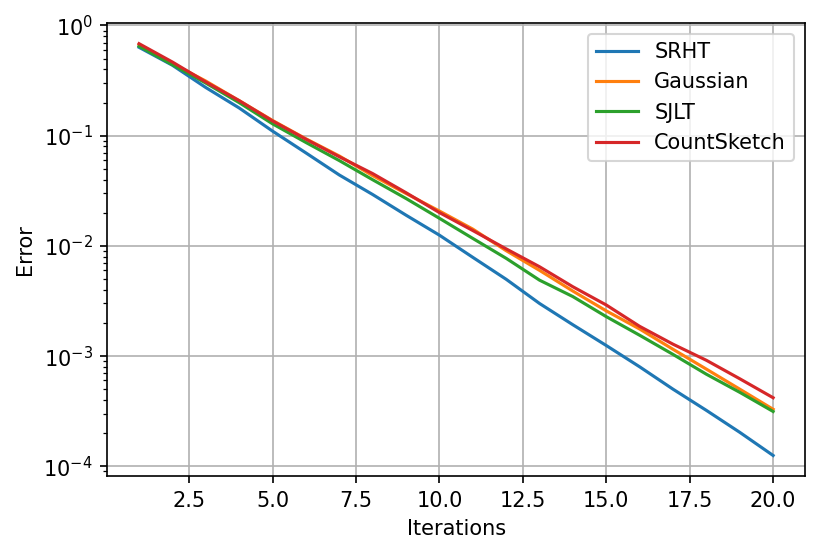

In [73]:
fig, ax = plt.subplots(dpi=150)
iterations = 1 + df.index
for c in set(df.columns.get_level_values(0)):
    if c != 'Exact(SVD)':
        ax.plot(iterations, df[c,'Coefficient Error'],label=c)
ax.legend()
ax.grid()
ax.set_yscale('log')
ax.set_ylabel('Error')
ax.set_xlabel('Iterations')

Text(0.5, 0, 'Time (Seconds)')

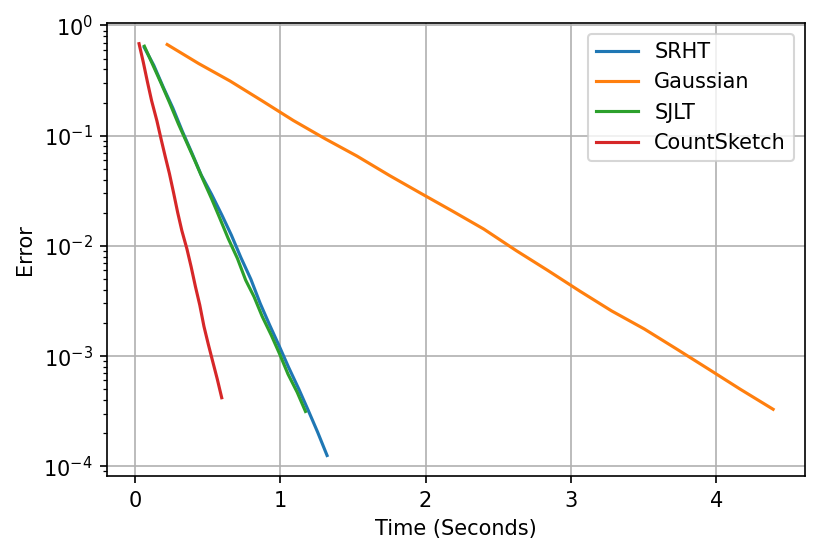

In [74]:
fig, ax = plt.subplots(dpi=150)
iterations = 1 + df.index
for c in set(df.columns.get_level_values(0)):
    total_time = 0.
    if c != 'Exact(SVD)':
        iter_time = df[c]['Sketch'] + df[c]['SVD'] + df[c]['Solve']
        ax.plot(iter_time.cumsum(),df[c,'Coefficient Error'],label=c)
ax.legend()
ax.grid()
ax.set_yscale('log')
#ax.set_xscale('log',base=2)
ax.set_ylabel('Error')
ax.set_xlabel('Time (Seconds)')

Text(0, 0.5, 'Time (Seconds)')

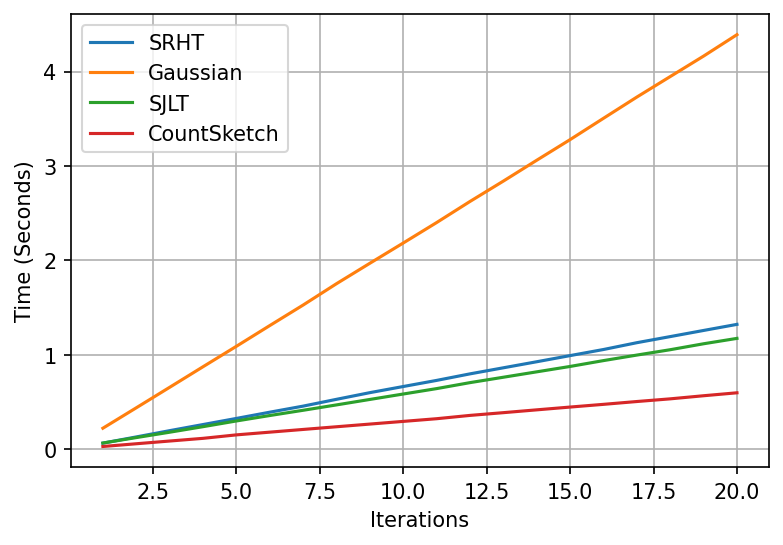

In [75]:
fig, ax = plt.subplots(dpi=150)
iterations = 1 + df.index
for c in set(df.columns.get_level_values(0)):
    total_time = 0.
    if c != 'Exact(SVD)':
        iter_time = df[c]['Sketch'] + df[c]['SVD'] + df[c]['Solve']
        ax.plot(iterations,iter_time.cumsum(),label=c)
ax.legend()
ax.grid()
#ax.set_yscale('log')
#ax.set_xscale('log',base=2)
ax.set_xlabel('Iterations')
ax.set_ylabel('Time (Seconds)')

1.0155408709863545


Text(0.5, 0, 'Iterations')

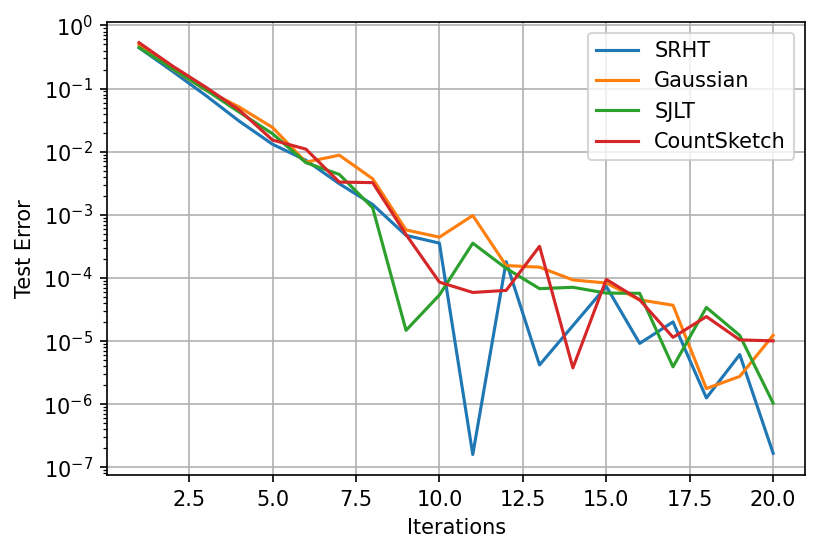

In [76]:
fig, ax = plt.subplots(dpi=150)
iterations = 1 + df.index
opt_test_error = df['Exact(SVD)']['Test Error'][0]
print(opt_test_error)
for c in set(df.columns.get_level_values(0)):
    if c != 'Exact(SVD)':
        test_err_ratio = np.abs(df[c,'Test Error']/opt_test_error - 1)
        ax.plot(iterations, test_err_ratio,label=c)
ax.legend()
ax.grid()
ax.set_yscale('log')
ax.set_ylabel('Test Error')
ax.set_xlabel('Iterations')

1.0155408709863545


Text(0.5, 0, 'Time')

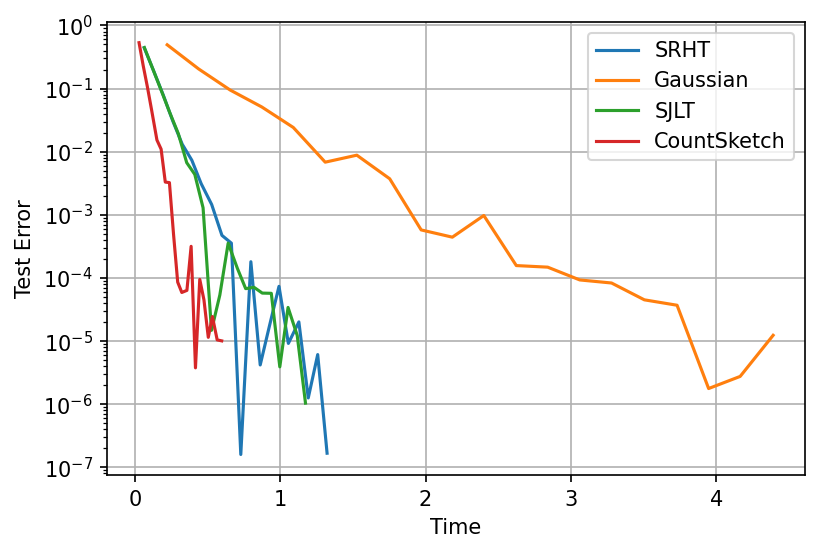

In [77]:
fig, ax = plt.subplots(dpi=150)
iterations = 1 + df.index
opt_test_error = df['Exact(SVD)']['Test Error'][0]
print(opt_test_error)
for c in set(df.columns.get_level_values(0)):
    if c != 'Exact(SVD)':
        iter_time = df[c]['Sketch'] + df[c]['SVD'] + df[c]['Solve']
        test_err_ratio = np.abs(df[c,'Test Error']/opt_test_error - 1)
        ax.plot(iter_time.cumsum(), test_err_ratio,label=c)
ax.legend()
ax.grid()
ax.set_yscale('log')
ax.set_ylabel('Test Error')
ax.set_xlabel('Time')

## ## EXPERIMENT 3 - ERROR ON REAL DATA


In [132]:
df = pd.read_csv('experiment3-cal_housing0.125.csv',header=[0,1]) # [0,1] for multiindex header
#df = pd.read_csv('experiment4-aloi.csv',header=[0,1]) 

In [133]:
df.columns

MultiIndex([( 'Exact(SVD)',            'Sketch'),
            ( 'Exact(SVD)',               'SVD'),
            ( 'Exact(SVD)',             'Solve'),
            ( 'Exact(SVD)', 'Coefficient Error'),
            ( 'Exact(SVD)',        'Test Error'),
            (  'Classical',            'Sketch'),
            (  'Classical',               'SVD'),
            (  'Classical',             'Solve'),
            (  'Classical', 'Coefficient Error'),
            (  'Classical',        'Test Error'),
            ('CountSketch',            'Sketch'),
            ('CountSketch',               'SVD'),
            ('CountSketch',             'Solve'),
            ('CountSketch', 'Coefficient Error'),
            ('CountSketch',        'Test Error'),
            (       'SRHT',            'Sketch'),
            (       'SRHT',               'SVD'),
            (       'SRHT',             'Solve'),
            (       'SRHT', 'Coefficient Error'),
            (       'SRHT',        'Test Error'),


In [134]:
df.head(20)

Exact(SVD)                                              Classical            \
      Sketch       SVD Solve Coefficient Error Test Error    Sketch       SVD   
0        0.0  0.008311   0.0               0.0   0.000135  0.000791  0.000895   
1        0.0  0.008311   0.0               0.0   0.000135  0.000791  0.000895   
2        0.0  0.008311   0.0               0.0   0.000135  0.000791  0.000895   
3        0.0  0.008311   0.0               0.0   0.000135  0.000791  0.000895   
4        0.0  0.008311   0.0               0.0   0.000135  0.000791  0.000895   
5        0.0  0.008311   0.0               0.0   0.000135  0.000791  0.000895   
6        0.0  0.008311   0.0               0.0   0.000135  0.000791  0.000895   
7        0.0  0.008311   0.0               0.0   0.000135  0.000791  0.000895   
8        0.0  0.008311   0.0               0.0   0.000135  0.000791  0.000895   
9        0.0  0.008311   0.0               0.0   0.000135  0.000791  0.000895   

                                         ...      SJLT                      \
     Solve Coefficient Error Test Error  ...    Sketch       SVD     Solve   
0  0.00088          0.003668   0.000242  ...  0.002694  0.000378  0.000466   
1  0.00088          0.003668   0.000242  ...  0.002619  0.000350  0.000413   
2  0.00088          0.003668   0.000242  ...  0.002590  0.000344  0.000402   
3  0.00088          0.003668   0.000242  ...  0.002585  0.000350  0.000399   
4  0.00088          0.003668   0.000242  ...  0.002564  0.000349  0.000401   
5  0.00088          0.003668   0.000242  ...  0.002561  0.000343  0.000398   
6  0.00088          0.003668   0.000242  ...  0.002603  0.000342  0.000397   
7  0.00088          0.003668   0.000242  ...  0.002599  0.000341  0.000396   
8  0.00088          0.003668   0.000242  ...  0.002561  0.000345  0.000399   
9  0.00088          0.003668   0.000242  ...  0.002559  0.000343  0.000398   

                                Gaussian                      \
  Coefficient Error Test Error    Sketch       SVD     Solve   
0      1.505266e-03   0.000132  0.108329  0.000474  0.000121   
1      5.385381e-04   0.000136  0.105965  0.000480  0.000131   
2      2.165495e-04   0.000136  0.104884  0.000483  0.000118   
3      7.513429e-05   0.000135  0.103831  0.000474  0.000114   
4      3.257293e-05   0.000135  0.105995  0.000478  0.000119   
5      1.302647e-05   0.000135  0.104731  0.000483  0.000119   
6      4.273320e-06   0.000135  0.105924  0.000457  0.000111   
7      1.597607e-06   0.000135  0.104227  0.000485  0.000114   
8      5.845365e-07   0.000135  0.106041  0.000467  0.000128   
9      2.464308e-07   0.000135  0.104504  0.000477  0.000117   

                                
  Coefficient Error Test Error  
0      1.521444e-03   0.000130  
1      6.225444e-04   0.000137  
2      2.743576e-04   0.000136  
3      1.021768e-04   0.000135  
4      3.898326e-05   0.000135  
5      1.573005e-05   0.000135  
6      6.052915e-06   0.000135  
7      2.096636e-06   0.000135  
8      8.352279e-07   0.000135  
9      3.479101e-07   0.000135  

[10 rows x 30 columns]

Text(0.5, 0, 'Iterations')

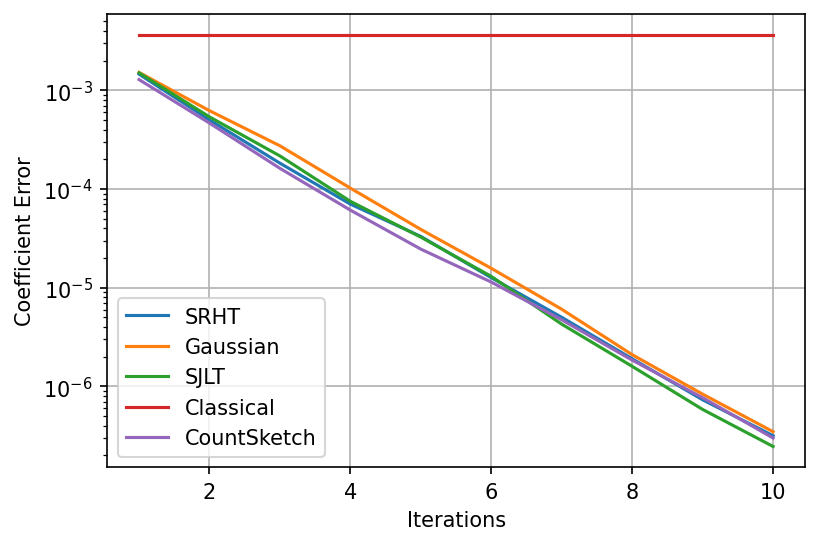

In [135]:
fig, ax = plt.subplots(dpi=150)
iterations = 1 + df.index
for c in set(df.columns.get_level_values(0)):
    if c != 'Exact(SVD)':
        ax.plot(iterations, df[c,'Coefficient Error'],label=c)
ax.legend()
ax.grid()
ax.set_yscale('log')
ax.set_ylabel('Coefficient Error')
ax.set_xlabel('Iterations')

Text(0.5, 0, 'Time (Seconds)')

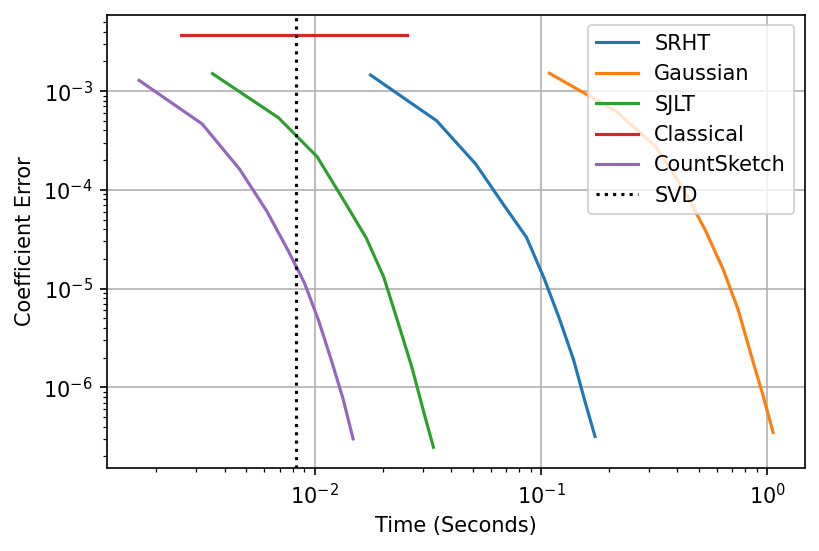

In [136]:
fig, ax = plt.subplots(dpi=150)
iterations = 1 + df.index
for c in set(df.columns.get_level_values(0)):
    total_time = 0.
    if c != 'Exact(SVD)':
        iter_time = df[c]['Sketch'] + df[c]['SVD'] + df[c]['Solve']
        ax.plot(iter_time.cumsum(),df[c,'Coefficient Error'],label=c)
ax.axvline(x=df['Exact(SVD)', 'SVD'].iloc[0],color='black',linestyle=':',label='SVD')
ax.legend()
ax.grid()
ax.set_yscale('log')
ax.set_xscale('log',base=10)
ax.set_ylabel('Coefficient Error')
ax.set_xlabel('Time (Seconds)')

0.0001350334432079


Text(0.5, 0, 'Iterations')

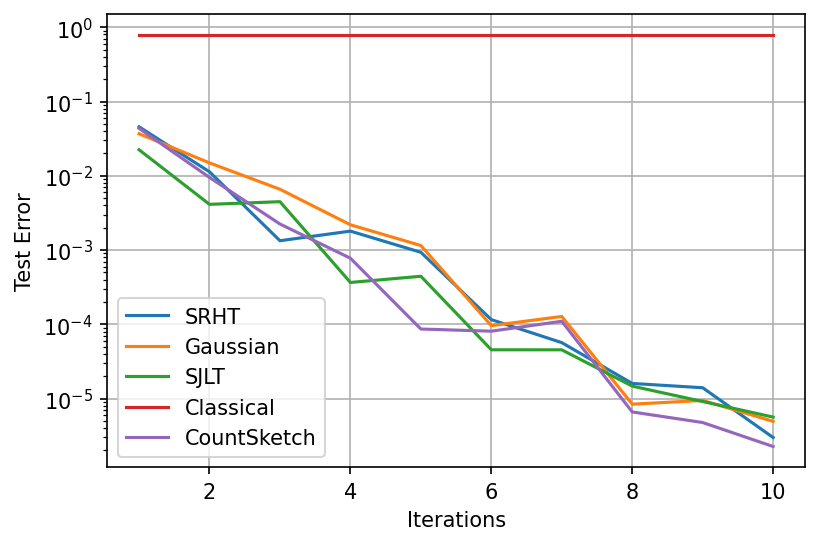

In [137]:
fig, ax = plt.subplots(dpi=150)
iterations = 1 + df.index
opt_test_error = df['Exact(SVD)']['Test Error'][0]
print(opt_test_error)
for c in set(df.columns.get_level_values(0)):
    if c != 'Exact(SVD)':
        test_err_ratio = np.abs(df[c,'Test Error']/opt_test_error - 1)
        ax.plot(iterations, test_err_ratio,label=c)
ax.legend()
ax.grid()
ax.set_yscale('log')
ax.set_ylabel('Test Error')
ax.set_xlabel('Iterations')

0.0001350334432079


Text(0.5, 0, 'Iterations')

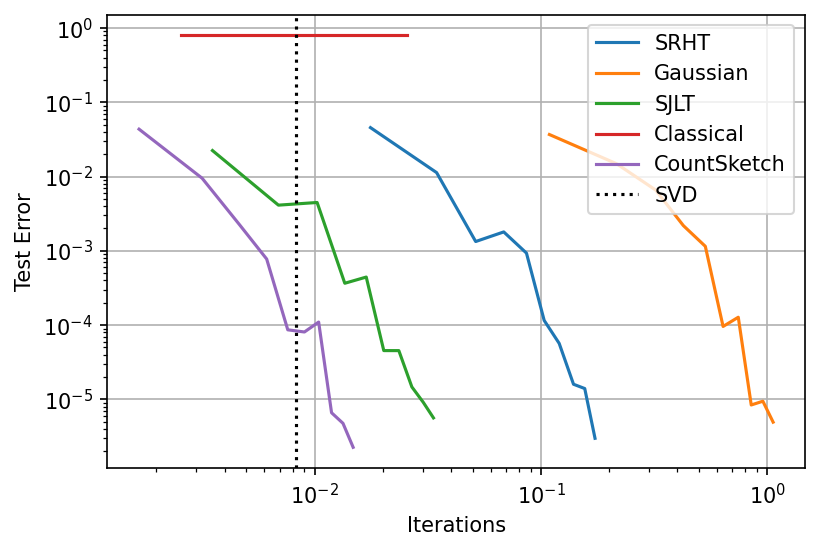

In [138]:
fig, ax = plt.subplots(dpi=150)
iterations = 1 + df.index
opt_test_error = df['Exact(SVD)']['Test Error'][0]
print(opt_test_error)
for c in set(df.columns.get_level_values(0)):
    if c != 'Exact(SVD)':
        test_err_ratio = np.abs(df[c,'Test Error']/opt_test_error - 1)
        iter_time = df[c]['Sketch'] + df[c]['SVD'] + df[c]['Solve']
        ax.plot(iter_time.cumsum(), test_err_ratio,label=c)
ax.axvline(x=df['Exact(SVD)', 'SVD'].iloc[0],color='black',linestyle=':',label='SVD')
ax.legend()
ax.grid()
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('Test Error')
ax.set_xlabel('Iterations')